# ***Neural Network By Hand!***
---



---











#0.Step#

##codding a little neural network from scratch##

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd

/content


In [ ]:
%cd /content/gdrive/

/content/gdrive


In [ ]:
ls -l

total 4
drwx------ 4 root root 4096 Jan 28 13:27 MyDrive/


In [ ]:
%cd MyDrive/

/content/gdrive/MyDrive


In [ ]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import random
import math
np.random.seed(42)

import matplotlib.pyplot as plt
FONTSIZE = 16
params = {
         'figure.figsize' : (6,6),
         'axes.labelsize' : FONTSIZE,
         'axes.titlesize' : FONTSIZE+2,
         'legend.fontsize': FONTSIZE,
         'xtick.labelsize': FONTSIZE,
         'ytick.labelsize': FONTSIZE,
         'xtick.color'    : 'black',
         'ytick.color'    : 'black',
         'axes.facecolor' : 'white',
         'axes.edgecolor' : 'black',
         'axes.titlepad'  :  20,
         'axes.labelpad'  :  10}
plt.rcParams.update(params)

XNAME = 'x1'; XLABEL = r'$x_1$'
YNAME = 'x2'; YLABEL = r'$x_2$'
RANGE = (-6, 6); STEP = 0.1

def predict(output_node, boundary_value):
  output_node.reshape(-1, 1, 1) # a list (m, 1, 1)
  predictions = np.array(output_node > boundary_value, dtype=int)
  return predictions

def plot_cost_vs_iter(train_costs, test_costs, title="Cost evolution"):

  fig, ax = plt.subplots(figsize=(8, 6))
  iters = np.arange(1,len(train_costs)+1)
  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')
  ax.set_xlabel("Number of iterations"); ax.set_xlim(1, iters[-1])
  ax.set_ylabel("Cost")
  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title)
  plt.show()


def get_decision_surface(weights, biases, boundary=0.5, range=RANGE, step=STEP):

  # Create a grid of points spanning the parameter space:
  x1v, x2v = np.meshgrid(np.arange(range[0], range[1]+step, step),
                         np.arange(range[0], range[1]+step, step))

  # Stack it so that it is shaped like X_train: (m,2)
  X_grid = np.c_[x1v.ravel(), x2v.ravel()].reshape(-1,2)

  # Feedforward on all grid points and get binary predictions:
  output = feedforward(X_grid, weights, biases)[-1] # getting only output node
  Ypred_grid = predict(output, boundary)

  return (x1v, x2v, Ypred_grid.reshape(x1v.shape))


def plot_scatter(sig, bkg, ds=None, xname=XNAME, xlabel=XLABEL, yname=YNAME, ylabel=YLABEL, range=RANGE, step=STEP, title="Scatter plot"):

  fig, ax = plt.subplots()

  # Decision surface
  if ds:
    (xx, yy, Z) = ds # unpack contour data
    cs = plt.contourf(xx, yy, Z, levels=[0,0.5,1], colors=['orange','dodgerblue'], alpha=0.3)

  # Scatter signal and background:
  ax.scatter(sig[xname], sig[yname], marker='o', s=10, c='dodgerblue', alpha=1, label='Positive class')
  ax.scatter(bkg[xname], bkg[yname], marker='o', s=10, c='orange',     alpha=1, label='Negative class')

  # Axes, legend and plot:
  ax.set_xlim(range); ax.set_xlabel(xlabel)
  ax.set_ylim(range); ax.set_ylabel(ylabel)

  ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False)
  ax.set_title(title)
  plt.show()

#1. Get the data#

##1.1: Get the data file##
##Getting and reading the files into train and test dataframes##



In [ ]:
ath="/content/gdrive/MyDrive"

train = pd.read_csv(path + "/ml_a3_data_train.csv")
test  = pd.read_csv(path + "/ml_a3_data_test.csv")

In [ ]:
train [:5]

,x1,x2,class
0,-0.136282,3.244889,0
1,-5.305888,5.629232,0
2,-4.147647,-0.226319,1
3,-2.170794,3.946986,0
4,-5.555908,1.155239,0


In [ ]:
test [: 5]

,x1,x2,class
0,3.967433,5.580323,1
1,-5.324361,-4.574185,1
2,5.635016,3.301594,1
3,2.369043,-2.431812,0
4,3.607040,-3.598197,0


##The train and test dataframes contains 320 and 80 samples respectively. The name of the column containing the labels is class and the class values are 0 and 1##

In [ ]:
print(f'There are {len(train)} samples in the dataset.')

There are 320 samples in the dataset.


In [ ]:
print(f'There are {len(test)} samples in the dataset.')

There are 80 samples in the dataset.


#1.2: Split signal vs background#

##Creating a sig and bkg dataframes that collect the real signal and value samples.##

In [ ]:
for name, d in zip(['train', 'test '],[train, test]):
  print(f"Dataset {name} has {d.shape[0]:5d} rows, \
        {(d['class'] == 1).sum():5d} signal VBF events, \
        {(d['class'] == 0).sum():5d} background ggf events.")

Dataset train has   320 rows,           149 signal VBF events,           171 background ggf events.
Dataset test  has    80 rows,            43 signal VBF events,            37 background ggf events.


In [ ]:
sig = train[train['class'] == 0]
bkg = train[train['class'] ==1 ]
sig.head()

,x1,x2,class
0,-0.136282,3.244889,0
1,-5.305888,5.629232,0
3,-2.170794,3.946986,0
4,-5.555908,1.155239,0
5,-2.775872,0.499611,0


#1.3: Dataframe to NumPy#

In [ ]:
inputs = ['x1', 'x2']
X_train = train[inputs].values
y_train = train['class'].values

X_test  = test[inputs].values
y_test  = test['class'].values
X_train

array([[-0.13628172,  3.24488901],
       [-5.30588788,  5.62923156],
       [-4.14764742, -0.22631878],
       [-2.17079432,  3.94698569],
       [-5.55590838,  1.15523854],
       [-2.77587169,  0.49961058],
       [ 0.33241331,  5.91557755],
       [-1.98907331,  3.25094644],
       [ 4.44118649, -5.74476707],
       [ 4.03176145,  2.35169047],
       [-4.65553317, -1.22573281],
       [-0.34108574, -1.05790903],
       [-1.84940332,  1.45098621],
       [ 5.09632342,  4.52807224],
       [-1.69841126, -4.60957129],
       [ 3.00737702,  3.68201687],
       [-2.26821214, -2.09780014],
       [ 5.46628435, -5.78120901],
       [-4.56161559, -1.94861794],
       [ 5.32871208, -5.52687826],
       [-4.77861033, -4.16569033],
       [-2.15063922, -3.76177788],
       [-1.49300457, -4.87221672],
       [-2.4666133 , -1.37882726],
       [-4.50404783,  5.05010259],
       [ 5.69273769,  5.83452893],
       [-5.19508227,  2.99952564],
       [ 0.58480547,  2.30274237],
       [ 3.09915835,

#checking the array conversion##

In [ ]:
X_train [: 5]

array([[-0.13628172,  3.24488901],
       [-5.30588788,  5.62923156],
       [-4.14764742, -0.22631878],
       [-2.17079432,  3.94698569],
       [-5.55590838,  1.15523854]])

In [ ]:
X_test [: 5]

array([[ 3.96743289,  5.58032293],
       [-5.32436069, -4.574185  ],
       [ 5.63501553,  3.30159388],
       [ 2.36904321, -2.43181191],
       [ 3.60704039, -3.59819707]])

In [ ]:
y_train [:5]

array([0, 0, 1, 0, 0])

#2. Functions#
##2.1: Weighted Sum##

In [ ]:
def z(x,w,b):
  return x@w.T+b.T

*0/1*

##Testing function z##

In [ ]:
z

<function __main__.z(a, W, b)>

#2.2: Activation Functions and Derivatives#

In [ ]:
from os import pipe2
def tanh(z):
  s1=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
  return s1

def sigmoid(z):
  p1=1/(1+np.exp(-z))
  return  p1

def sigmoid_prime(z):
  # s2=np.exp(-z)/(1+np.exp(-z))**2
  s2=sigmoid(z)*(1-sigmoid(z))
  return s2

def tanh_prime(z):
  # p2=np.sum((np.exp(z)+np.exp(-z))**2-(np.exp(z)-np.exp(-z))**2/(np.exp(z)+np.exp(-z))**2)
  p2=1-tanh(z)**2
  return p2

#2.3: Cross-entropy cost function#

In [ ]:
def cross_entropy_cost(y_preds, y_vals):
  m= y_preds.shape[0]
  loss= -np.sum((y_vals*np.log(y_preds)+(1-y_vals)*np.log(1-y_preds)))
  return loss/m

*1/1*

#2.4: Derivative of the Loss#

$\frac{d}{\hat{dy}^{(i)}}L (\hat{y}^{(i)},y^{(i)}) = - \big[\frac{y^{(i)}}{\hat{y}^{(i)}} -\frac{1-y^{(i)}}{1-\hat{y}^{(i)}}\big]$

In [ ]:
def  L_prime(y_preds, y_obs):
   loss= -((y_obs/(y_preds)-(1-y_obs)/(1-y_preds)))
   return loss/len(y_preds)

*2/2*

##Testing the L_prime function##

In [ ]:
L_prime(200,800)

-8.015075376884422

#3. Feedforward#

##3.1: Feedforward Propagation##

In [ ]:
def feedforward(input_X, weights, biases):

  W1, W2, W3 = weights ; b1, b2, b3 = biases
  input_X  = np.array(input_X)
  m  = len(input_X)
  a0 = input_X.reshape((m, 1, -1))
  # print(a0.shape)

  # First layer
  z1= z(a0,W1,b1)
  # print(z1.shape)
  a1=tanh(z1)
  # print(a1.shape)

  # #...

  # # Second layer
  z2= z(a1,W2,b2)
  # print("z2", z2.shape)
  a2=tanh(z2)
  # print(a2.shape)
  # #...

  # # Third layer
  z3= z(a2,W3,b3)
  a3=sigmoid(z3)
  # print(a3.shape)


  nodes = [a0, z1, a1, z2, a2, z3, a3]

  return nodes

In [ ]:
# Initialization
m = len(X_train)     # number of data samples
n = X_train.shape[1] # number of input features
q = 3 # number of nodes in first hidden layer
r = 2 # number of nodes in second hidden layer

W1=np.random.rand(q, n)*0.01
b1= np.random.rand(q, 1)
W2= np.random.rand(r, q)*0.01
b2= np.random.rand(r, 1)
W3= np.random.rand(1, r)*0.01
b3= np.random.rand(1, 1)
# W1=np.random.rand(n, q)*0.01
# b1= np.random.rand(1, q)
# W2= np.random.rand(q, r)*0.01
# b2= np.random.rand(r, 1)
# W3= np.random.rand(r, 1)*0.01
# b3= np.random.rand(1, 1)

In [ ]:

weights= (W1, W2, W3)
biases= (b1, b2, b3)

In [ ]:
nodes= feedforward(X_train, weights, biases)

##3.2: Predict##

## The output_node in this context is of a list (m, 1, 1) ##
## The type of values that the function predict return is int##
##After successfully executing the feedforward function, I would call the function predict by passing the parameters of the inputs to the function.##

#4. Neural Network Training#

In [ ]:
# Hyperparameters
alpha = 0.01
N = 1000 # epochs

# Initialization
m = len(X_train)     # number of data samples
n = X_train.shape[1] # number of input features
q = 3 # number of nodes in first hidden layer
r = 2 # number of nodes in second hidden layer

# WEIGHT MATRICES + BIASES
W1=np.random.rand(q, n)
b1= np.zeros((q, 1))
W2= np.random.rand(r, q)
b2= np.zeros((r, 1))
W3= np.random.rand(1, r)
b3= np.zeros((1, 1))
# weights= (W1, W2, W3)
# biases= (b1, b2, b3)

# OUTPUT LAYER
y_train = np.reshape(y_train, (-1, 1, 1))
y_test  = np.reshape(y_test , (-1, 1, 1))

# Storing cost values for train and test datasets
costs_train = []
costs_test  = []
debug = False

print("Starting the training\n")

# -------------------
#   Start iterations
# -------------------
for t in range(1, N+1):
  weights= (W1, W2, W3)
  biases= (b1, b2, b3)

  # FORWARD PROPAGATION
  # Feedforward on test data:
  nodes_test = feedforward(X_test, weights, biases)
  ypreds_test = nodes_test[6]

  # Feedforward on train data:
  a0, z1, a1, z2, a2, z3, a3 = feedforward(X_train, weights, biases)
  ypreds_train =  a3

  # Cost computation and storage
  J_train = cross_entropy_cost(ypreds_train, y_train)
  J_test  = cross_entropy_cost(ypreds_test,  y_test )
  costs_train.append(J_train)
  costs_test.append(J_test)

  if (t<=100 and t % 10 == 0) or (t>100 and t % 100 == 0):
      print(f"Iteration {t}\t Train cost = {J_train:.4f}  Test cost = {J_test:.4f}   Diff = {J_test-J_train:.5f}")

  # BACKWARD PROPAGATION
  # Errors delta:
  delta_3 = L_prime(a3, y_train)
  delta_2 = L_prime(a2, y_train)
  delta_1 = L_prime(a1, y_train)

  # Partial derivatives:
  dCostdW3 =delta_3.reshape(-1,1)* sigmoid_prime(z3).reshape(-1,1)
  dCostdW3= dCostdW3.T@a2.squeeze()
  dCostdW2 = ((delta_3.reshape(-1,1)* sigmoid_prime(z3).reshape(-1,1))@W3*tanh_prime(z2).squeeze()).T@a1.squeeze()
  dCostdW1 = ((((delta_3.reshape(-1,1)* sigmoid_prime(z3).reshape(-1,1))@W3*tanh_prime(z2).squeeze()).T)@((a0.squeeze()@W2)*tanh_prime(z1).squeeze())).T
#   dCostdW1 = ((a0.squeeze()*((delta_3.reshape(-1,1)* sigmoid_prime(z3).reshape(-1,1))@W3*tanh_prime(z2).squeeze()))@W2).T@tanh_prime(z1).squeeze()
  dCostdb3 = delta_3.reshape(-1,1).T@ sigmoid_prime(z3).reshape(-1,1)
  dCostdb2 = (((delta_3.reshape(-1,1)* sigmoid_prime(z3).reshape(-1,1)).T@tanh_prime(z2).squeeze()).T*W3.T)
  dCostdb1 = (((W3@(tanh_prime(z2).squeeze().T))*((delta_3.reshape(-1,1)* sigmoid_prime(z3).reshape(-1,1)).T))@tanh_prime(z1).squeeze()).T

  if debug and t<3:
    print(f"a0: {a0.shape} a1: {a1.shape} a2: {a2.shape} a3: {a3.shape} ")
    print(f"W3: {W3.shape} z1: {z1.shape} z2: {z2.shape} z3: {z3.shape} ")
    print(f"dCostdW3: {dCostdW3.shape} dCostdW2: {dCostdW2.shape} dCostdW1: {dCostdW1.shape}")

#   # Update of weights and biases
  W3 = W3- alpha* dCostdW3
  W2 = W2- alpha* dCostdW2
  W1 = W1- alpha* dCostdW1
  b3 = b3- alpha* dCostdb3
  b2 = b2- alpha* dCostdb2
#   b1 = b1- alpha* dCostdb1

# print(f'\nEnd of gradient descent after {t} iterations')

Starting the training

Iteration 10	 Train cost = 0.7370  Test cost = 0.7471   Diff = 0.01005
Iteration 20	 Train cost = 0.7346  Test cost = 0.7445   Diff = 0.00997
Iteration 30	 Train cost = 0.7323  Test cost = 0.7421   Diff = 0.00989
Iteration 40	 Train cost = 0.7301  Test cost = 0.7399   Diff = 0.00982
Iteration 50	 Train cost = 0.7280  Test cost = 0.7378   Diff = 0.00976
Iteration 60	 Train cost = 0.7261  Test cost = 0.7358   Diff = 0.00971
Iteration 70	 Train cost = 0.7243  Test cost = 0.7339   Diff = 0.00966
Iteration 80	 Train cost = 0.7226  Test cost = 0.7322   Diff = 0.00962
Iteration 90	 Train cost = 0.7209  Test cost = 0.7305   Diff = 0.00958
Iteration 100	 Train cost = 0.7194  Test cost = 0.7290   Diff = 0.00956
Iteration 200	 Train cost = 0.7080  Test cost = 0.7175   Diff = 0.00947
Iteration 300	 Train cost = 0.7013  Test cost = 0.7109   Diff = 0.00957
Iteration 400	 Train cost = 0.6973  Test cost = 0.7071   Diff = 0.00973
Iteration 500	 Train cost = 0.6949  Test cost = 0.

#5. Plots#

##5.1: Cost evolution##

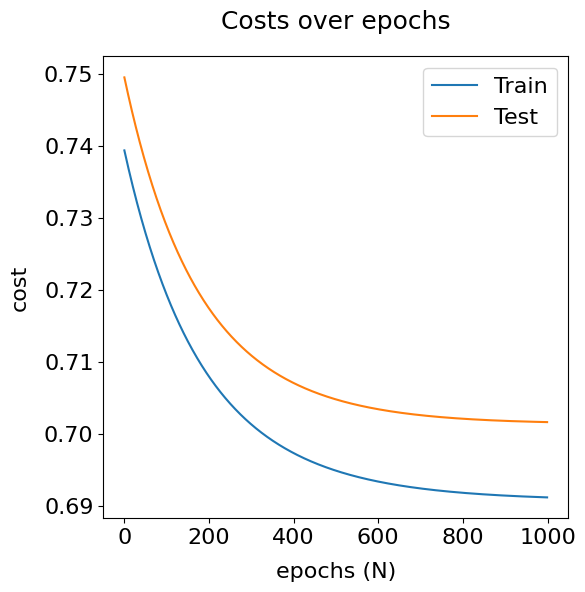

In [ ]:
plt.plot(costs_train, label='Train')
plt.plot(costs_test, label='Test')
plt.legend()
plt.title('Costs over epochs')
plt.xlabel('epochs (N)')
plt.ylabel('cost')
plt.show()

#5.2: Scatter Plot#

In [ ]:
import numpy as np
import pandas as pd
import random
import math
np.random.seed(42)

import matplotlib.pyplot as plt
FONTSIZE = 16
params = {
         'figure.figsize' : (6,6),
         'axes.labelsize' : FONTSIZE,
         'axes.titlesize' : FONTSIZE+2,
         'legend.fontsize': FONTSIZE,
         'xtick.labelsize': FONTSIZE,
         'ytick.labelsize': FONTSIZE,
         'xtick.color'    : 'black',
         'ytick.color'    : 'black',
         'axes.facecolor' : 'white',
         'axes.edgecolor' : 'black',
         'axes.titlepad'  :  20,
         'axes.labelpad'  :  10}
plt.rcParams.update(params)

XNAME = 'x1'; XLABEL = r'$x_1$'
YNAME = 'x2'; YLABEL = r'$x_2$'
RANGE = (-6, 6); STEP = 0.1

def predict(output_node, boundary_value):
  output_node.reshape(-1, 1, 1) # a list (m, 1, 1)
  predictions = np.array(output_node > boundary_value, dtype=int)
  return predictions

def plot_cost_vs_iter(train_costs, test_costs, title="Cost evolution"):

  fig, ax = plt.subplots(figsize=(8, 6))
  iters = np.arange(1,len(train_costs)+1)
  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')
  ax.set_xlabel("Number of iterations"); ax.set_xlim(1, iters[-1])
  ax.set_ylabel("Cost")
  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title)
  plt.show()


def get_decision_surface(weights, biases, boundary=0.5, range=RANGE, step=STEP):

  # Create a grid of points spanning the parameter space:
  x1v, x2v = np.meshgrid(np.arange(range[0], range[1]+step, step),
                         np.arange(range[0], range[1]+step, step))

  # Stack it so that it is shaped like X_train: (m,2)
  X_grid = np.c_[x1v.ravel(), x2v.ravel()].reshape(-1,2)

  # Feedforward on all grid points and get binary predictions:
  output = feedforward(X_grid, weights, biases)[-1] # getting only output node
  Ypred_grid = predict(output, boundary)

  return (x1v, x2v, Ypred_grid.reshape(x1v.shape))


def plot_scatter(sig, bkg, ds=None, xname=XNAME, xlabel=XLABEL, yname=YNAME, ylabel=YLABEL, range=RANGE, step=STEP, title="Scatter plot"):

  fig, ax = plt.subplots()

  # Decision surface
  if ds:
    (xx, yy, Z) = ds # unpack contour data
    cs = plt.contourf(xx, yy, Z, levels=[0,0.5,1], colors=['orange','dodgerblue'], alpha=0.3)

  # Scatter signal and background:
  ax.scatter(sig[xname], sig[yname], marker='o', s=10, c='dodgerblue', alpha=1, label='Positive class')
  ax.scatter(bkg[xname], bkg[yname], marker='o', s=10, c='orange',     alpha=1, label='Negative class')

  # Axes, legend and plot:
  ax.set_xlim(range); ax.set_xlabel(xlabel)
  ax.set_ylim(range); ax.set_ylabel(ylabel)

  ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False)
  ax.set_title(title)
  plt.show()


In [ ]:
get_decision_surface(weights, biases, boundary=0.5, range=RANGE, step=STEP)

(array([[-6. , -5.9, -5.8, ...,  5.8,  5.9,  6. ],
        [-6. , -5.9, -5.8, ...,  5.8,  5.9,  6. ],
        [-6. , -5.9, -5.8, ...,  5.8,  5.9,  6. ],
        ...,
        [-6. , -5.9, -5.8, ...,  5.8,  5.9,  6. ],
        [-6. , -5.9, -5.8, ...,  5.8,  5.9,  6. ],
        [-6. , -5.9, -5.8, ...,  5.8,  5.9,  6. ]]),
 array([[-6. , -6. , -6. , ..., -6. , -6. , -6. ],
        [-5.9, -5.9, -5.9, ..., -5.9, -5.9, -5.9],
        [-5.8, -5.8, -5.8, ..., -5.8, -5.8, -5.8],
        ...,
        [ 5.8,  5.8,  5.8, ...,  5.8,  5.8,  5.8],
        [ 5.9,  5.9,  5.9, ...,  5.9,  5.9,  5.9],
        [ 6. ,  6. ,  6. , ...,  6. ,  6. ,  6. ]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

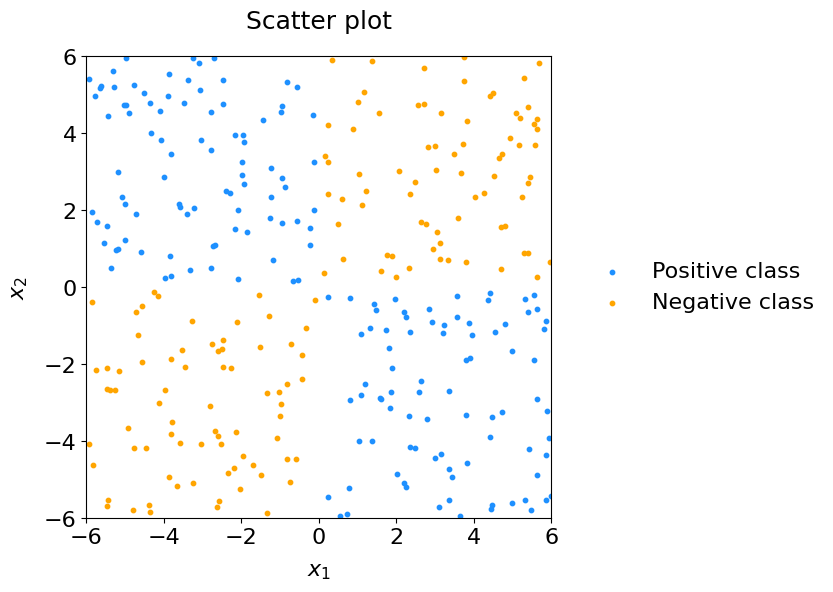

In [ ]:
plot_scatter(sig, bkg, ds=None, xname=XNAME, xlabel=XLABEL, yname=YNAME, ylabel=YLABEL, range=RANGE, step=STEP, title="Scatter plot")


# ***Fun!***